# Banks Distribution - Gustavo Gerner Moherdaui

The followig code simulates the distribution of banks given the exogenous distribution of informational costs of the economy, denoted by $\gamma$ and certain parameters of the model: Expected investment returns of idiossincratic and relationship banking components $\mu_x$ and $\mu_z$ and their volatility $\sigma_x$ and $\sigma_z$. 

As a result, we have how many banks are formed, the level of relationship banking - $\alpha$ - and the size of the bank - the number of projects/agents its composed of.

In [4]:
#Libraries:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd
import scipy
from scipy.optimize import fsolve
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint 
from scipy.optimize import NonlinearConstraint
import matplotlib.pyplot as plt
import math

In [49]:
 class dist_banks:
    def __init__(self, gamma_dist,mu_x,mu_z,sig_x,sig_z,even_dist):
        self.gamma_dist,self.N,self.mu_x,self.mu_z,self.sig_x,self.sig_z,self.even_dist = \
        -np.sort(-gamma_dist),len(gamma_dist),mu_x,mu_z,sig_x,sig_z,even_dist
        
        
    #Given $\alpha$ and size of the bank, the minimum informational cost $\gamma$:
    
    def gamma_bar(self,a,n):
        sig_x_h=a**2*self.sig_x
        sig_z_h=(1-a)**2*self.sig_z
        return((1/(n*np.sqrt(2*np.pi)))*(sig_z_h+n*sig_x_h)/np.sqrt(sig_z_h+sig_x_h))
        
    #auxiliary functions:
    
    def objective(self,a):
        return -a
    
    def constraint(self,a,n,gamma):
        return -self.gamma_bar(a,n)+gamma
    
    def extract_values(self,dictionary):
        alpha = dictionary['x'][0]
        invest = dictionary['success']
        return alpha, invest
    
    #Distribution of banks and their characteristics ($\alpha$ and size)
    
    
    def dist_banks(self): 
        if self.even_dist == True:
            a0=0.5
            banks=pd.DataFrame({"size":[],"gamma":[],"alpha":[],"invest":[]})
            gammas = self.gamma_dist
            #auxiliary variables:
            n=1
            k=0 
            while n <self.N:

                def constraint_1(a):
                    return -self.gamma_bar(a,n-k)+gammas[n-1]

                def constraint_2(a):
                    return -self.gamma_bar(a,n-k+1)+gammas[n]

                sol_1 = minimize(self.objective, a0, constraints={'type': 'ineq', 'fun': constraint_1},bounds=[(0,1)],tol=10**(-8))

                alpha_1=sol_1.x

                sol_2 = minimize(self.objective, a0, constraints={'type': 'ineq', 'fun': constraint_2},bounds=[(0,1)],tol=10**(-8))

                alpha_2=sol_2.x

                if (alpha_1<=alpha_2) or (sol_1.success==False):
                    a0=alpha_2
                    n=n+1

                else:
                    banks.loc[len(banks)] = [n-k,gammas[n-1],alpha_1[0],sol_1.success]
                    k=n
                    a0=alpha_2
                    n=n+1

            return banks.loc[banks["invest"]==1] 

        else:
            k=0
            a0=np.repeat(0.5,self.N)
            gammas=pd.DataFrame({"size":range(1,self.N+1),"gamma":self.gamma_dist,"a0":a0}) 
            banks=pd.DataFrame({"size":[],"gamma":[],"alpha":[],"invest":[]})

            while len(gammas)>0:

                alphas = gammas.apply(lambda row: minimize(self.objective, row["a0"], constraints=
                {'type': 'ineq', 'fun': self.constraint,'args':(row["size"],row["gamma"])},bounds=[(0,1)],tol=10**(-6)), 1)

                gammas[['alpha', 'invest']] = alphas.apply(lambda row: pd.Series(self.extract_values(row)))

                if len(gammas.loc[gammas["invest"]==True])==0:
                    break

                else:
                    k=gammas.loc[gammas["invest"]==True]["alpha"].idxmax(axis=1) # row that defines a coalition

                    banks.loc[len(banks)]=gammas.iloc[k,]

                    gammas=gammas.iloc[k+1:len(gammas),]

                    gammas.reset_index(drop=True, inplace=True)

                    gammas.loc[:,"size"]=gammas.index.values+1

                    gammas.loc[:,"a0"]=gammas.loc[:,"alpha"] #permits faster convergence

            return banks
     

The class "dist_banks" not only gives a simulation of the economy given the parameters but also gives important functions such as "gamma_bar" ($\underline{\gamma}(\alpha,n)$), the minimum informational cost in which a bank of size $n$ and with the level of relationship banking $\alpha$ can still be opaque, that is, do not creates incentives to late investors search about projects in the portfolio. 

#  Results - Evenly spaced distribution

About the condition "even_dist", it simulates with a faster method the distribution of banks if the distribution of $\gamma$ is evenly spaced, that is, the distance between the highest $\gamma$ and the second highest is the same as the distance between the second and the third and so on. Unfortunately, this method is guaranteed only in this special case and could give wrong results otherwise. 

Cases where the number of agents are higher than $10^3$ are way less time consuming in this way.

This special case is important as it gives an intuition on the marginal effect of including a new agent at the cost of a project with lower informational cost. 

In [65]:
dist=dist_banks(gamma_dist=np.linspace(0.38,0,500),mu_x=1,mu_z=1,sig_x=1,sig_z=1,even_dist=True)
banks=dist1.dist_banks()
banks

,size,gamma,alpha,invest
0,1.0,0.380000,0.951272,1.0
1,1.0,0.378729,0.947902,1.0
2,1.0,0.377458,0.944519,1.0
3,1.0,0.376187,0.941122,1.0
4,1.0,0.374916,0.937709,1.0
5,1.0,0.373645,0.934282,1.0
6,1.0,0.372375,0.930839,1.0
7,1.0,0.371104,0.927380,1.0
8,1.0,0.369833,0.923905,1.0
9,2.0,0.367291,0.920656,1.0


Above, we can see a certain correlation between bank size and the level of relationship banking $\alpha$. We can plot this result:

Text(0.5, 1.0, 'Banks')

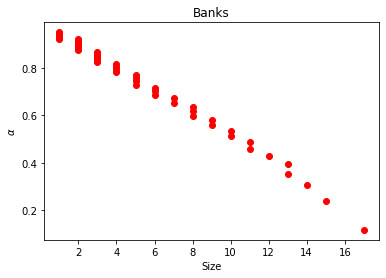

In [66]:
#Plot showing relation between $\alpha$ and bank size 
#(I recommend to use a lower N lever for visualisation, N=500 is a good option)
plt.plot(banks.loc[0:len(banks),"size"], banks.loc[0:len(banks),"alpha"],'o',color= "red")
plt.xlabel('Size')
plt.ylabel(r'$\alpha$')
plt.title("Banks")

We can see the model implies negative correlation between bank size and the level of relationship banking ($\alpha$), as expected. Also, it implies there are more smaller banks than big ones, something I (for the moment) cannot explain why it occurs but goes well with data (an unexpected good result from the model)

To investigate the later, we can create an histogram:

Text(0.5, 0, 'Bank Size')

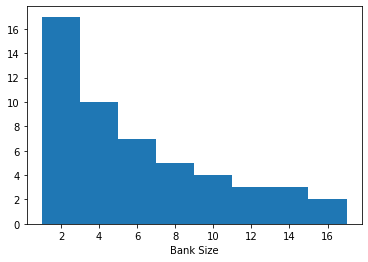

In [70]:
#Histogram showing bank size distributiom
plt.hist(banks["size"],bins=8)
plt.xlabel('Bank Size')

Therefore, we can note a tendency of the market to form large banks with low levels of relationship banking and small ones with high levels given the constraint from the necessity to guarantee opaqueness in the liability side. 